In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Steps and Milestones (100%):

 Setup Environment and Load Necessary Packages (5%)

 Data Preparation (40%)

o Loading Data (5%)

o Cleaning Data (10%)

o Data Representation & Feature Engineering (If Any) (15%)

o Creating Train and Validation Set (10%)

 Model Creation (30%)

o Write & Configure Model (10%)

o Compile Model (10%)

o Build Model & Checking Summary (10%)

 Training and Evaluation (25%)

o Run Multiple Experiments (10%)


o Reason & Visualize Model Performance (5%)

o Evaluate Model on Test Set (10%)

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.15.0'

In [0]:
# there were 2 folders named train and test.
# train folder had 12 sub-folder each named by a class of plants
# uploaded the zip files off the two folders in google drive

In [0]:
from zipfile import ZipFile

In [0]:
# extracting data from train folder

In [0]:
with ZipFile('/content/drive/My Drive/Great Learning Residency 7.2 CNN/Project 1/train.zip', 'r') as z:
  z.extractall()

In [0]:
# extracting data from test folder

In [0]:
with ZipFile('/content/drive/My Drive/Great Learning Residency 7.2 CNN/Project 1/test.zip', 'r') as z:
  z.extractall()

In [0]:
import os
from skimage.io import imread
from skimage.transform import resize 
# resize perform Gaussian smoothing to avoid aliasing artifacts . once the images were read from skimage and resize was performed there was a problem in converting the list of array (X_train) into np.array with error that array of size 128X128X3 cant be resized into 128X128 . OPEN CV does not have that problem.

In [0]:
# processing test data

In [0]:
X_test=[]
X_test_name=[]
os.chdir('/content/test') # changing directory

In [9]:
os.listdir()[0] # first image in test folder

'248436078.png'

In [10]:
image_1 = imread(os.listdir()[0]) # reading the first image
print(image_1.shape)
print(image_1)

(295, 295, 3)
[[[109  86  57]
  [114  93  63]
  [123 104  75]
  ...
  [ 77  53  35]
  [ 72  48  28]
  [ 71  47  28]]

 [[112  88  58]
  [115  93  63]
  [119 100  69]
  ...
  [ 81  59  42]
  [ 75  53  35]
  [ 73  50  32]]

 [[111  86  57]
  [113  91  60]
  [115  96  64]
  ...
  [ 79  59  42]
  [ 78  58  41]
  [ 77  55  39]]

 ...

 [[102  91  72]
  [105  91  73]
  [105  89  72]
  ...
  [ 78  51  37]
  [ 76  50  35]
  [ 79  55  40]]

 [[105  94  77]
  [105  92  75]
  [106  91  75]
  ...
  [ 77  51  37]
  [ 72  45  31]
  [ 77  51  36]]

 [[114 103  87]
  [108  95  79]
  [107  94  79]
  ...
  [ 77  54  38]
  [ 78  55  39]
  [ 77  52  36]]]


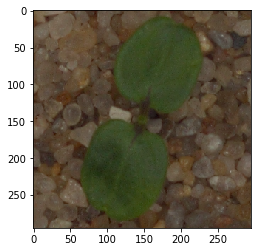

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image_1) # the first test image

In [12]:
os.listdir()[0:10] # first ten images in test folder

['248436078.png',
 '69d1669f8.png',
 '2d992d1fb.png',
 'bfab3e3d0.png',
 'fb022edf9.png',
 '3d67c434b.png',
 '599691cd9.png',
 '46c14fde2.png',
 '099b961ec.png',
 '54b3afd58.png']

In [13]:
for i in os.listdir()[0:10]:
  image_example = imread(i)
  print(image_example.shape) # printing their shape
  

(295, 295, 3)
(269, 269, 3)
(209, 209, 3)
(248, 248, 3)
(223, 223, 3)
(347, 347, 3)
(239, 239, 3)
(295, 295, 3)
(298, 298, 3)
(330, 330, 3)


In [0]:
# Images are of different shape so reshaping all images into a common size is important

In [0]:
import cv2

In [0]:
for i in os.listdir():

    dummy = cv2.imread(i) # reading all test images
    dummy = cv2.resize(dummy,(128,128)) #resize to have all the images of same size  
    X_test.append(dummy)
    X_test_name.append(i)


In [16]:
X_test[0:3] # first three converted images

[array([[[ 61,  91, 113],
         [ 66,  97, 116],
         [ 73, 100, 120],
         ...,
         [ 39,  56,  79],
         [ 39,  56,  79],
         [ 32,  50,  73]],
 
        [[ 60,  88, 112],
         [ 67,  98, 116],
         [ 75, 102, 121],
         ...,
         [ 45,  64,  84],
         [ 43,  61,  79],
         [ 45,  60,  80]],
 
        [[ 56,  81, 107],
         [ 65,  93, 114],
         [ 73, 100, 118],
         ...,
         [ 43,  63,  84],
         [ 40,  56,  79],
         [ 43,  59,  80]],
 
        ...,
 
        [[ 71,  88, 101],
         [ 68,  84,  98],
         [ 70,  85, 100],
         ...,
         [ 37,  55,  74],
         [ 42,  61,  82],
         [ 59,  77,  93]],
 
        [[ 71,  90, 102],
         [ 70,  86, 104],
         [ 69,  84, 101],
         ...,
         [ 42,  59,  77],
         [ 38,  54,  78],
         [ 45,  61,  83]],
 
        [[ 78,  94, 107],
         [ 73,  90, 104],
         [ 75,  92, 105],
         ...,
         [ 35,  53,  73],
  

In [17]:
X_test[0].shape 

(128, 128, 3)

In [0]:
X_test[2].shape

(128, 128, 3)

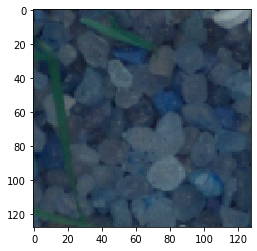

In [22]:
plt.imshow(X_test[2])

In [23]:
X_test_name[0:10]

['248436078.png',
 '69d1669f8.png',
 '2d992d1fb.png',
 'bfab3e3d0.png',
 'fb022edf9.png',
 '3d67c434b.png',
 '599691cd9.png',
 '46c14fde2.png',
 '099b961ec.png',
 '54b3afd58.png']

In [0]:
# processing train data

In [0]:
os.chdir('/content/train/Black-grass') # having a look at one of the subfolders of the train folder

In [25]:
os.getcwd()

'/content/train/Black-grass'

In [26]:
os.listdir()[0] # first image if the sub folder

'54b2dac6e.png'

In [27]:
image_1 = imread(os.listdir()[0]) # reading and printing the shape
print(image_1.shape)
print(image_1)

(780, 780, 3)
[[[ 86  70  59]
  [ 92  74  65]
  [ 90  70  62]
  ...
  [180 185 184]
  [190 195 194]
  [188 193 192]]

 [[ 89  72  61]
  [ 90  71  61]
  [ 91  70  61]
  ...
  [185 189 188]
  [189 194 193]
  [190 195 194]]

 [[ 86  68  55]
  [ 89  70  58]
  [ 91  71  60]
  ...
  [180 184 184]
  [188 193 193]
  [185 189 189]]

 ...

 [[ 93  88  91]
  [ 92  88  90]
  [ 91  89  90]
  ...
  [ 77  73  72]
  [ 76  73  71]
  [ 73  70  68]]

 [[ 99  95  97]
  [ 92  89  90]
  [ 91  89  90]
  ...
  [ 78  75  74]
  [ 77  74  73]
  [ 76  74  72]]

 [[ 88  86  86]
  [ 90  89  90]
  [ 91  90  90]
  ...
  [ 82  79  78]
  [ 81  79  78]
  [ 74  72  71]]]


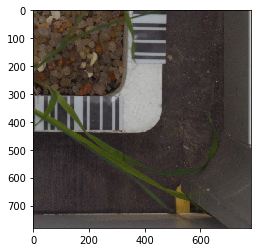

In [28]:
plt.imshow(image_1)

In [29]:
os.listdir()[0:10]

['54b2dac6e.png',
 'ade525bad.png',
 '675a6956e.png',
 '6e027ec7d.png',
 '260c4eed3.png',
 '3a8c485bc.png',
 'df2e6e002.png',
 'd3ff1a639.png',
 '9e2bfa93d.png',
 '5d358beb9.png']

In [30]:
for i in os.listdir()[0:10]:
  image_example = imread(i)
  print(image_example.shape)

(780, 780, 3)
(2266, 2267, 3)
(565, 565, 3)
(352, 352, 3)
(93, 93, 3)
(638, 638, 3)
(677, 677, 3)
(1311, 1311, 3)
(478, 478, 3)
(2511, 2512, 3)


In [0]:
# the sizes are different, must be converted into similar size

In [0]:
X_train=[]
Y_train=[]
os.chdir('/content/train')

In [32]:
ls

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


In [33]:
os.listdir()

['Maize',
 'Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Loose Silky-bent',
 'Cleavers',
 'Charlock',
 'Sugar beet',
 'Scentless Mayweed',
 'Black-grass',
 'Common Chickweed',
 'Small-flowered Cranesbill']

In [34]:
#There are 12 distinct categories. Let see on how the train data is splitted among these categories: 
for i in os.listdir():
  path, dirs, files = next(os.walk(i))
  print (i + " : " + str(len(files)))

Maize : 221
Shepherds Purse : 231
Fat Hen : 475
Common wheat : 221
Loose Silky-bent : 654
Cleavers : 287
Charlock : 390
Sugar beet : 385
Scentless Mayweed : 516
Black-grass : 263
Common Chickweed : 611
Small-flowered Cranesbill : 496


In [0]:
# highly imbalance dataset. Image augmentation must be performed otherwise the model will be bias towards the class having higher samples if the model is fed with those imabalnced data

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]
  
# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

In [37]:
#The data is imbalanced among categories. Lets balance it by augmentation.

from skimage import io

#Lets generated new images such that each category have same number of images, to eradicate imbalance and bias.
num_files_desired = 700
num_files = 0

for i in os.listdir():
    if (os.path.isdir(i)):
            Images = []
            folder_path = "/content/train/" + i
            for j in os.listdir(i):
                Images.append(folder_path + "/" + j)
            
            Img_cnt = len(Images)
            Cnt_diff = num_files_desired - Img_cnt
            num_generated_files = 0
            print ("In " + i + ", " + str(Cnt_diff) + " new images will be added by augmentation...")
            while num_generated_files < Cnt_diff:
                # random image from the folder
                image_path = random.choice(Images)
                # read image as an two dimensional array of pixels
                image_to_transform = sk.io.imread(image_path)

                # random num of transformation to apply
                num_transformations_to_apply = random.randint(1, len(available_transformations))

                num_transformations = 0
                transformed_image = None
                while num_transformations <= num_transformations_to_apply:
                    # random transformation to apply for a single image
                    key = random.choice(list(available_transformations))
                    transformed_image = available_transformations[key](image_to_transform)
                    num_transformations += 1

                    new_file_path = '%s/augmented_image_%s.png' % (folder_path, num_files)

                    # write image to the disk
                    io.imsave(new_file_path, transformed_image)
                    num_generated_files += 1
                    num_files += 1

In Maize, 479 new images will be added by augmentation...


In Shepherds Purse, 469 new images will be added by augmentation...


In Fat Hen, 225 new images will be added by augmentation...


In Common wheat, 479 new images will be added by augmentation...


In Loose Silky-bent, 46 new images will be added by augmentation...


In Cleavers, 413 new images will be added by augmentation...


In Charlock, 310 new images will be added by augmentation...


In Sugar beet, 315 new images will be added by augmentation...


In Scentless Mayweed, 184 new images will be added by augmentation...


In Black-grass, 437 new images will be added by augmentation...


In Common Chickweed, 89 new images will be added by augmentation...


In Small-flowered Cranesbill, 204 new images will be added by augmentation...


In [38]:
# post augmentation 
for i in os.listdir():
  path, dirs, files = next(os.walk(i))
  print (i + " : " + str(len(files)))

Maize : 702
Shepherds Purse : 700
Fat Hen : 700
Common wheat : 701
Loose Silky-bent : 700
Cleavers : 700
Charlock : 702
Sugar beet : 700
Scentless Mayweed : 703
Black-grass : 700
Common Chickweed : 700
Small-flowered Cranesbill : 702


In [39]:
for i in os.listdir():
    print("class-",i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
              try:
                    dummy = cv2.imread( i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    X_train.append(dummy)
                    Y_train.append(i)
              except Exception as e:
                    print(e) 
                

class- Maize
class- Shepherds Purse
class- Fat Hen
class- Common wheat
class- Loose Silky-bent
class- Cleavers
class- Charlock
class- Sugar beet
class- Scentless Mayweed
class- Black-grass
class- Common Chickweed
class- Small-flowered Cranesbill


In [40]:
X_train[0:5]

[array([[[ 73,  76,  92],
         [ 66,  71,  90],
         [ 71,  74,  91],
         ...,
         [ 70,  70,  87],
         [ 70,  73,  89],
         [ 60,  65,  77]],
 
        [[ 73,  78,  93],
         [ 64,  71,  87],
         [ 68,  71,  86],
         ...,
         [ 71,  72,  93],
         [ 69,  72,  91],
         [ 62,  68,  85]],
 
        [[ 70,  72,  85],
         [ 65,  69,  85],
         [ 70,  74,  88],
         ...,
         [ 70,  71,  91],
         [ 61,  63,  83],
         [ 51,  59,  79]],
 
        ...,
 
        [[ 46,  48,  60],
         [ 47,  46,  58],
         [ 54,  57,  64],
         ...,
         [112, 137, 150],
         [105, 129, 145],
         [104, 126, 140]],
 
        [[ 42,  45,  56],
         [ 53,  54,  65],
         [ 55,  57,  65],
         ...,
         [106, 131, 143],
         [107, 130, 144],
         [104, 125, 138]],
 
        [[ 55,  61,  69],
         [ 44,  50,  59],
         [ 60,  65,  72],
         ...,
         [103, 129, 138],
  

(128, 128, 3)


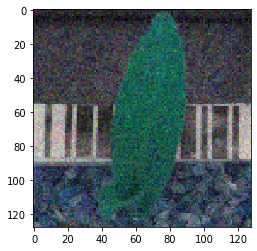

In [43]:
plt.imshow(X_train[10])
print(X_train[10].shape)

(128, 128, 3)


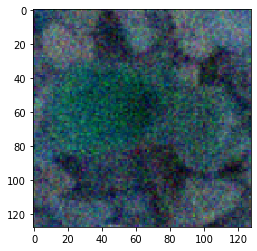

In [44]:
plt.imshow(X_train[50])
print(X_train[50].shape)

In [45]:
Y_train[0:5]

['Maize', 'Maize', 'Maize', 'Maize', 'Maize']

In [46]:
print ("No. of images in X_train: ", len(X_train))
print ("No. of images in X_test: ", len(X_test))
print ("No. of values in y_train: ", len(Y_train))

No. of images in X_train:  8410
No. of images in X_test:  794
No. of values in y_train:  8410


In [47]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)


In [0]:
#Get lable encoding for Y_train

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)

In [0]:
import numpy as np

In [50]:
print("Total Plant categories (Unique Target): ", len(np.unique(Y_train)))

Total Plant categories (Unique Target):  12


In [0]:
y_train = tf.keras.utils.to_categorical(Y_train, num_classes=12)

In [0]:
y_train = np.array(y_train)
X_train = np.array(X_train)

In [0]:
#performing train test split

In [53]:
from sklearn.model_selection import train_test_split

X_train_set , X_val, y_train_set, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
print ("No. of images in train dataset: ", len(X_train_set))
print ("No. of images in Validation dataset: ", len(X_val))

No. of images in train dataset:  6728
No. of images in Validation dataset:  1682


In [54]:
print ("X_train_set Shape: ", X_train_set.shape)
print ("X_val Shape: ", X_val.shape)
print("y_train_set Shape: ", y_train_set.shape)
print("y_val Shape: ", y_val.shape)

X_train_set Shape:  (6728, 128, 128, 3)
X_val Shape:  (1682, 128, 128, 3)
y_train_set Shape:  (6728, 12)
y_val Shape:  (1682, 12)


In [0]:
tf.set_random_seed(42)

In [0]:
# building basic Cnn model

In [0]:
#Import necessary libraries to build the model...
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam
from keras.optimizers import sgd
from keras.layers import LeakyReLU

In [0]:
model1 = Sequential()
model1.add(BatchNormalization(input_shape = (128,128,3)))
model1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
model1.add(MaxPooling2D(pool_size=2))

model1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))


model1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))


model1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=2))


model1.add(Flatten()) 

# fully connected layer
model1.add(Dense(units=128,activation = 'relu'))
model1.add(Dense(units = 64, activation = 'relu'))

model1.add(Dense(units = 32, activation = 'relu'))

model1.add(Dense(units = 12, activation = 'softmax'))


In [0]:
model1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [88]:
model1.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_34 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_166 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_167 (MaxPoolin (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_168 (MaxPoolin (None, 15, 15, 128)     

In [89]:
hist_model = model1.fit(X_train_set,y_train_set,
                    epochs=30, 
                    validation_data=(X_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 6728 samples, validate on 1682 samples
Epoch 1/30
6728/6728 [==============================] - 13s 2ms/step - loss: 1.9131 - acc: 0.2820 - val_loss: 1.5872 - val_acc: 0.3918
Epoch 2/30
6728/6728 [==============================] - 6s 827us/step - loss: 1.0017 - acc: 0.6379 - val_loss: 0.7155 - val_acc: 0.7348
Epoch 3/30
6728/6728 [==============================] - 5s 803us/step - loss: 0.6222 - acc: 0.7826 - val_loss: 0.6826 - val_acc: 0.7556
Epoch 4/30
6728/6728 [==============================] - 5s 810us/step - loss: 0.4683 - acc: 0.8328 - val_loss: 0.5861 - val_acc: 0.8008
Epoch 5/30
6728/6728 [==============================] - 6s 825us/step - loss: 0.3245 - acc: 0.8830 - val_loss: 0.5623 - val_acc: 0.8323
Epoch 6/30
6728/6728 [==============================] - 6s 824us/step - loss: 0.2678 - acc: 0.9037 - val_loss: 0.4899 - val_acc: 0.8674
Epoch 7/30
6728/6728 [==============================] - 5s 802us/step - loss: 0.1939 - acc: 0.9316 - val_loss: 0.5336 - val_acc: 0.8526
E

In [0]:
# building another model with leakyrelu as th activation function

In [0]:
model2 = Sequential()
model2.add(BatchNormalization(input_shape = (128,128,3)))
model2.add(Convolution2D(32, (3,3), input_shape = (128, 128, 3))) 
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))


model2.add(Convolution2D(filters=64, kernel_size=5, padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))


model2.add(Convolution2D(filters=128, kernel_size=4, padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))


model2.add(Convolution2D(filters=128, kernel_size=3, padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))


model2.add(Convolution2D(filters=128, kernel_size=2, padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))


model2.add(Flatten()) 

# fully connected layer
model2.add(Dense(units=128))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(units = 64))
model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(units = 32))
model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(units = 12, activation = 'softmax'))

In [0]:

model2.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [94]:
model2.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_36 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_273 (LeakyReLU)  (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 63, 63, 64)        51264     
_________________________________________________________________
leaky_re_lu_274 (LeakyReLU)  (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_176 (MaxPoolin (None, 31, 31, 64)      

In [96]:
hist_model2 = model2.fit(X_train_set,y_train_set,
                    epochs=30, 
                    validation_data=(X_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Train on 6728 samples, validate on 1682 samples
Epoch 1/30
6728/6728 [==============================] - 14s 2ms/step - loss: 1.6626 - acc: 0.4019 - val_loss: 0.9877 - val_acc: 0.6421
Epoch 2/30
6728/6728 [==============================] - 6s 962us/step - loss: 0.8628 - acc: 0.7001 - val_loss: 0.7177 - val_acc: 0.7390
Epoch 3/30
6728/6728 [==============================] - 7s 969us/step - loss: 0.6012 - acc: 0.7916 - val_loss: 0.5017 - val_acc: 0.8181
Epoch 4/30
6728/6728 [==============================] - 6s 957us/step - loss: 0.4394 - acc: 0.8383 - val_loss: 0.6019 - val_acc: 0.8008
Epoch 5/30
6728/6728 [==============================] - 7s 971us/step - loss: 0.3520 - acc: 0.8729 - val_loss: 0.4294 - val_acc: 0.8704
Epoch 6/30
6728/6728 [==============================] - 7s 985us/step - loss: 0.3015 - acc: 0.8899 - val_loss: 0.4078 - val_acc: 0.8627
Epoch 7/30
6728/6728 [==============================] - 7s 982us/step - loss: 0.2749 - acc: 0.9074 - val_loss: 0.4277 - val_acc: 0.8478
E

In [0]:
# accuracy has minutely improved

In [0]:
# Running multiple experiments 

In [0]:
# Trying to optimise kernel initailizer using grid search

In [97]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(init_mode='uniform'):
  model = Sequential()
  model.add(BatchNormalization(input_shape = (128,128,3)))
  model.add(Convolution2D(32, (3,3), input_shape = (128, 128, 3), kernel_initializer = init_mode)) 
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
  

  model.add(Convolution2D(filters=64, kernel_size=5, padding='same', kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 

  model.add(Convolution2D(filters=128, kernel_size=4, padding='same', kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 
  model.add(Convolution2D(filters=128, kernel_size=3, padding='same', kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 

  model.add(Convolution2D(filters=128, kernel_size=2, padding='same', kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))

  model.add(Flatten()) 

  # fully connected layer
  model.add(Dense(units=128, kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(units = 64, kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))
)
  model.add(Dense(units = 32, kernel_initializer = init_mode))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(units = 12, activation = 'softmax', kernel_initializer = init_mode)) 
  model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

# create model
modelOp = KerasClassifier(build_fn=create_model, epochs=10, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=modelOp, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train_set, y_train_set)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828478 using {'init_mode': 'lecun_uniform'}
0.762039 (0.008769) with: {'init_mode': 'uniform'}
0.828478 (0.001486) with: {'init_mode': 'lecun_uniform'}
0.809602 (0.008472) with: {'init_mode': 'normal'}
0.084423 (0.000595) with: {'init_mode': 'zero'}
0.813169 (0.009661) with: {'init_mode': 'glorot_normal'}
0.791171 (0.001040) with: {'init_mode': 'glorot_uniform'}
0.822681 (0.001932) with: {'init_mode': 'he_normal'}
0.791023 (0.027051) with: {'init_mode': 'he_uniform'}


In [0]:
# optimizing batch size and number of epochs using grid search

In [100]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(init_mode='uniform'):
  model = Sequential()
  model.add(BatchNormalization(input_shape = (128,128,3)))
  model.add(Convolution2D(32, (3,3), input_shape = (128, 128, 3), kernel_initializer = 'lecun_uniform')) 
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 

  model.add(Convolution2D(filters=64, kernel_size=5, padding='same', kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 

  model.add(Convolution2D(filters=128, kernel_size=4, padding='same', kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
  

  model.add(Convolution2D(filters=128, kernel_size=3, padding='same', kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
 

  model.add(Convolution2D(filters=128, kernel_size=2, padding='same', kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=2))
  

  model.add(Flatten()) 

  # fully connected layer
  model.add(Dense(units=128, kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dense(units = 64, kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))
 
  model.add(Dense(units = 32, kernel_initializer = 'lecun_uniform'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(units = 12, activation = 'softmax')) 
  model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

# create model
modelOp = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [ 40, 60, 80]
epochs = [20, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=modelOp, param_grid=param_grid, n_jobs=1, scoring="accuracy", cv=2)
grid_result = grid.fit(X_train_set, np.argmax(y_train_set, axis=1))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.864447 using {'batch_size': 60, 'epochs': 50}
0.841706 (0.007283) with: {'batch_size': 40, 'epochs': 20}
0.854340 (0.007432) with: {'batch_size': 40, 'epochs': 30}
0.850327 (0.009067) with: {'batch_size': 40, 'epochs': 50}
0.810939 (0.027943) with: {'batch_size': 60, 'epochs': 20}
0.823722 (0.036861) with: {'batch_size': 60, 'epochs': 30}
0.864447 (0.002675) with: {'batch_size': 60, 'epochs': 50}
0.807075 (0.010702) with: {'batch_size': 80, 'epochs': 20}
0.804845 (0.019174) with: {'batch_size': 80, 'epochs': 30}
0.814061 (0.029281) with: {'batch_size': 80, 'epochs': 50}


In [0]:
# final model based on the results of the abpve grid searches

In [0]:
model_f = Sequential()
model_f.add(BatchNormalization(input_shape = (128,128,3)))
model_f.add(Convolution2D(32, (3,3), input_shape = (128, 128, 3), kernel_initializer = 'lecun_uniform')) 
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(MaxPooling2D(pool_size=2))


model_f.add(Convolution2D(filters=64, kernel_size=5, padding='same', kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(MaxPooling2D(pool_size=2))


model_f.add(Convolution2D(filters=128, kernel_size=4, padding='same', kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(MaxPooling2D(pool_size=2))


model_f.add(Convolution2D(filters=128, kernel_size=3, padding='same', kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(MaxPooling2D(pool_size=2))


model_f.add(Convolution2D(filters=128, kernel_size=2, padding='same', kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(MaxPooling2D(pool_size=2))


model_f.add(Flatten()) 

# fully connected layer
model_f.add(Dense(units=128, kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
model_f.add(Dense(units = 64, kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))

model_f.add(Dense(units = 32, kernel_initializer = 'lecun_uniform'))
model_f.add(LeakyReLU(alpha=0.1))
#output layer
model_f.add(Dense(units = 12, activation = 'softmax'))

In [0]:
model_f.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [104]:
model_f.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_94 (Batc (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_465 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_737 (LeakyReLU)  (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_465 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_466 (Conv2D)          (None, 63, 63, 64)        51264     
_________________________________________________________________
leaky_re_lu_738 (LeakyReLU)  (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_466 (MaxPoolin (None, 31, 31, 64)      

In [122]:
hist_model_f = model_f.fit(X_train_set,y_train_set,
                    epochs=50, 
                    validation_data=(X_val,y_val),
                    verbose = 1,
                    initial_epoch=0, batch_size=60)

Train on 6728 samples, validate on 1682 samples
Epoch 1/50
6728/6728 [==============================] - 26s 4ms/step - loss: 1.7737 - acc: 0.3527 - val_loss: 1.8439 - val_acc: 0.4132
Epoch 2/50
6728/6728 [==============================] - 6s 872us/step - loss: 1.0149 - acc: 0.6387 - val_loss: 0.8905 - val_acc: 0.6706
Epoch 3/50
6728/6728 [==============================] - 6s 891us/step - loss: 0.6248 - acc: 0.7782 - val_loss: 0.6298 - val_acc: 0.7860
Epoch 4/50
6728/6728 [==============================] - 6s 903us/step - loss: 0.4852 - acc: 0.8267 - val_loss: 0.4150 - val_acc: 0.8603
Epoch 5/50
6728/6728 [==============================] - 6s 877us/step - loss: 0.3701 - acc: 0.8674 - val_loss: 0.4165 - val_acc: 0.8597
Epoch 6/50
6728/6728 [==============================] - 6s 893us/step - loss: 0.2531 - acc: 0.9076 - val_loss: 0.3507 - val_acc: 0.8734
Epoch 7/50
6728/6728 [==============================] - 6s 887us/step - loss: 0.1946 - acc: 0.9270 - val_loss: 0.3634 - val_acc: 0.8859
E

In [0]:
# Predict the accuracy 

In [0]:
# predictions and evaluation and classification report for validation data

In [0]:
predictions_train = model_f.predict(X_train_set)

In [124]:
from sklearn import metrics
print ("Train Accuracy: ", metrics.accuracy_score(np.argmax(y_train_set, axis=1), np.argmax(predictions_train, axis=1)))

Train Accuracy:  0.9988109393579072


In [125]:
from sklearn.metrics import classification_report

print ("Classification Report for train data")
print(classification_report(np.argmax(y_train_set, axis=1), np.argmax(predictions_train, axis=1)))

Classification Report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       546
           1       1.00      1.00      1.00       544
           2       1.00      1.00      1.00       560
           3       1.00      1.00      1.00       565
           4       1.00      1.00      1.00       566
           5       1.00      1.00      1.00       551
           6       1.00      1.00      1.00       556
           7       1.00      1.00      1.00       570
           8       1.00      1.00      1.00       587
           9       1.00      0.99      1.00       554
          10       1.00      1.00      1.00       553
          11       1.00      1.00      1.00       576

    accuracy                           1.00      6728
   macro avg       1.00      1.00      1.00      6728
weighted avg       1.00      1.00      1.00      6728



In [0]:
# predictions and evaluation and classification report for validation data

In [0]:
predictions_val = model_f.predict(X_val)

In [128]:
print ("Val Accuracy: ", metrics.accuracy_score(np.argmax(y_val, axis=1), np.argmax(predictions_val, axis=1)))

Val Accuracy:  0.9209274673008323


In [129]:
print ("Classification Report for Validation data")
print(classification_report(np.argmax(y_val, axis=1), np.argmax(predictions_val, axis=1)))

Classification Report for Validation data
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       154
           1       0.94      0.96      0.95       158
           2       0.98      0.95      0.96       140
           3       0.91      0.96      0.94       135
           4       0.95      0.99      0.97       135
           5       0.93      0.95      0.94       149
           6       0.86      0.69      0.76       144
           7       0.96      0.98      0.97       132
           8       0.94      0.87      0.90       116
           9       0.98      0.90      0.94       146
          10       0.92      0.98      0.95       149
          11       0.96      0.93      0.94       124

    accuracy                           0.92      1682
   macro avg       0.92      0.92      0.92      1682
weighted avg       0.92      0.92      0.92      1682



In [0]:
#The category 0 and 6 have very less f1 score.  the model can be made to learn more on these categories.  more augmentation in these categories can be done and  model can be made learn better

In [0]:
# Evaluate Model on Test Set

In [0]:
X_test = np.array(X_test)

In [0]:
predictions_= model_f.predict(X_test)

In [0]:
FinalPred = np.argmax(predictions_, axis=1)

In [144]:
FinalPred

array([ 2,  1,  6, 11,  5,  5, 10,  0,  9,  2,  0,  6,  3,  6,  8,  6,  9,
        5, 11,  6, 10,  4, 10,  3,  3,  9,  2,  9,  1, 10,  9,  6,  3, 10,
        7,  2,  8,  6, 10,  9, 11,  1, 10, 10,  7,  3,  5,  6, 10, 10,  6,
        5,  3,  4, 10,  4,  5,  9,  2,  2, 10,  5,  5,  3,  8, 10,  8,  5,
        1,  6,  3,  0,  3, 10,  1,  6,  8, 11,  9,  2, 10, 11, 10,  3,  9,
        3,  9,  6,  3,  3, 11,  4,  6,  8, 11,  6, 10,  1, 10, 11, 11,  2,
        5,  1,  2,  5,  6, 11,  9, 10,  3,  4,  1,  6,  8,  3,  5,  7,  6,
        6,  6,  6, 11,  5,  3,  3,  6, 10,  2,  3,  6,  6,  9,  5, 11,  8,
        5,  1,  0,  8, 10,  3,  6,  3,  8, 10,  8,  4,  3,  3,  5,  3, 10,
       11,  2,  5, 11,  0, 11,  6,  8,  8,  7,  8, 11,  4,  5, 11,  9,  0,
        3,  5,  2,  8,  7,  1,  8,  3,  9,  3,  6,  4,  3, 10,  6,  4, 11,
        3, 11,  6,  3, 11, 11,  5, 10, 10, 10,  2,  1,  5, 11,  7,  0,  2,
        1,  9, 11,  3,  3,  6,  6,  3,  1,  3,  9,  5,  8, 10,  2,  6,  3,
        5,  6,  6,  3,  9

In [0]:
y_test = le.inverse_transform(FinalPred)

In [143]:
y_test

array(['Cleavers', 'Charlock', 'Loose Silky-bent', 'Sugar beet',
       'Fat Hen', 'Fat Hen', 'Small-flowered Cranesbill', 'Black-grass',
       'Shepherds Purse', 'Cleavers', 'Black-grass', 'Loose Silky-bent',
       'Common Chickweed', 'Loose Silky-bent', 'Scentless Mayweed',
       'Loose Silky-bent', 'Shepherds Purse', 'Fat Hen', 'Sugar beet',
       'Loose Silky-bent', 'Small-flowered Cranesbill', 'Common wheat',
       'Small-flowered Cranesbill', 'Common Chickweed',
       'Common Chickweed', 'Shepherds Purse', 'Cleavers',
       'Shepherds Purse', 'Charlock', 'Small-flowered Cranesbill',
       'Shepherds Purse', 'Loose Silky-bent', 'Common Chickweed',
       'Small-flowered Cranesbill', 'Maize', 'Cleavers',
       'Scentless Mayweed', 'Loose Silky-bent',
       'Small-flowered Cranesbill', 'Shepherds Purse', 'Sugar beet',
       'Charlock', 'Small-flowered Cranesbill',
       'Small-flowered Cranesbill', 'Maize', 'Common Chickweed',
       'Fat Hen', 'Loose Silky-bent', 'Small

In [0]:
X_test_name = np.array(X_test_name)
y_test = np.array(y_test)
dataset = pd.DataFrame({'file': X_test_name, 'species': y_test}, columns=['file', 'species'])

In [146]:
dataset.head()

,file,species
0,248436078.png,Cleavers
1,69d1669f8.png,Charlock
2,2d992d1fb.png,Loose Silky-bent
3,bfab3e3d0.png,Sugar beet
4,fb022edf9.png,Fat Hen


In [0]:
dataset.to_csv("/content/drive/My Drive/Great Learning Residency 7.2 CNN/Project 1/ResultsPlantClassification.csv", index=False)

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

Download 100%.


In [151]:
!kaggle competitions submit -c plant-seedlings-classification -f "/content/drive/My Drive/Great Learning Residency 7.2 CNN/Project 1/ResultsPlantClassification.csv" -m "GUpload"

401 - Unauthorized


In [0]:
# there was a problem uploading results to kaggle to get test accuracy . Similiar problem was there will downloading the dataset using import kaggle